In [1]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=b12b40f9709deb00a50c3877a53479b850b0b52aa9809d5c45a4fb55bbd60409
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import re
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
import cv2
import glob
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
import shutil
from decimal import Decimal, getcontext
import wget
import requests
from urllib.request import urlopen as uReq
from google.colab.patches import cv2_imshow
import datetime
import altair as alt

from PIL import Image
import glob 

import tensorflow as tf

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
mdata = pd.read_csv('milkweed/Milkweed_iNaturalist.csv', sep=',', encoding='latin-1')
mdata.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,user_id,user_login,user_name,created_at,updated_at,...,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,101943,Sun Jul 15 2012 14:33:04 GMT-0500 (CDT),7/15/2012,2012-07-15 19:33:04 UTC,Central Time (US & Canada),6113,montanamike,NaN,2012-07-16 01:41:15 UTC,2017-05-13 02:16:27 UTC,...,NaN,NaN,False,NaN,NaN,common milkweed,Asclepias syriaca,common milkweed,Plantae,47911
1,160843,12/11/2012,12/11/2012,NaN,Central Time (US & Canada),8882,bouteloua,cassi saari,2012-12-12 02:52:15 UTC,2018-03-11 20:16:29 UTC,...,NaN,NaN,False,NaN,NaN,common milkweed,Asclepias syriaca,common milkweed,Plantae,47911
2,311680,"June 25, 2013 10:49:00 AM CDT",6/25/2013,2013-06-25 15:49:00 UTC,Central Time (US & Canada),18260,mergirl22,NaN,2013-06-25 19:54:12 UTC,2017-05-13 02:26:32 UTC,...,NaN,NaN,False,gps,gps,common milkweed,Asclepias syriaca,common milkweed,Plantae,47911
3,375506,Wed Aug 21 2013 10:31:33 GMT-0500 (CDT),8/21/2013,2013-08-21 15:31:33 UTC,Central Time (US & Canada),19192,eplonka1,NaN,2013-08-24 15:22:46 UTC,2017-05-13 03:31:51 UTC,...,NaN,NaN,False,NaN,NaN,common milkweed,Asclepias syriaca,common milkweed,Plantae,47911
4,393770,9/5/2013 14:32,9/5/2013,2013-09-05 21:32:03 UTC,Pacific Time (US & Canada),2991,sea-kangaroo,NaN,2013-09-10 21:12:19 UTC,2023-03-05 17:34:49 UTC,...,NaN,NaN,False,NaN,manual,Broadleaf Milkweed,Asclepias syriaca,common milkweed,Plantae,47911


In [4]:
imgnames = []

for val in range(len(mdata)):
  try:
    url = mdata.image_url[val]
    wget.download(url, out='milkweed/img/')
    old_name = 'milkweed/img/'+ url[url.rindex('/')+1:]
    new_name = 'milkweed/img/'+ url[url.rindex('/')+1: url.rindex('.')] + str(val) + url[url.rindex('.'):]
    os.rename(old_name, new_name)
    imgnames.append(new_name)
  except:
    print(val)

mdata['images'] = imgnames

# **Clustering Based On Month**

In [5]:
months = pd.to_datetime(mdata['observed_on'], format='%m/%d/%Y').dt.month 
mdata['month'] = months


In [53]:

x = list(set(mdata['month']))
y = list(mdata['month'].value_counts(sort=False).sort_index())

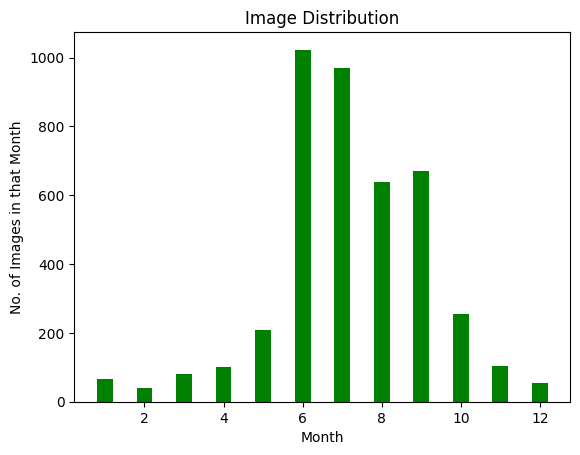

In [54]:
ig = plt.figure()
 
# creating the bar plot
plt.bar(x, y, color ='green',
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("No. of Images in that Month")
plt.title("Image Distribution")
plt.show()

In [13]:
mdata['month'].value_counts()


6     1023
7      971
9      671
8      640
10     254
5      207
11     103
4      101
3       81
1       67
12      53
2       39
Name: month, dtype: int64

In [ ]:
#pictures in June vs pictures in October
#def showmonth(month1, month2):
  


# **Clustering Based On Greenness**

Gives Individual Color Clusters

In [ ]:
for imgname in os.listdir('milkweed/img'):
  img = cv2.imread('milkweed/img/' + imgname)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.reshape((img.shape[0] * img.shape[1], 3))
  clt = KMeans(n_clusters = 30)
  clt.fit(img)
  numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
  (hist, _) = np.histogram(clt.labels_, bins = numLabels)
  hist = hist.astype("float")
  hist /= hist.sum()
  bar = np.zeros((50, 300, 3), dtype = "uint8")
  startX = 0
  for (percent, color) in zip(hist, clt.cluster_centers_):
    endX = startX + (percent * 300)
    cv2.rectangle(bar, (int(startX), 0), (int(endX), 50), color.astype("uint8").tolist(), -1)
    startX = endX
  
  #plt.savefig(bar)
  barname = imgname[:imgname.rindex('.')]
  cv2.imwrite('milkweed/colorbars/' +barname+'.png',bar)




  

 


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
